<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/short-labs-pandas/solow_data(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# iván andrés trujillo
# ivantrujillo1229@gmail.com

In [3]:
!pip install wbgapi

In [17]:
import wbgapi as wb
import matplotlib.pyplot as plt

In [5]:
economies = wb.economy.DataFrame().reset_index() # This is very important.
df =wb.data.DataFrame(["NY.GNS.ICTR.ZS", "SP.POP.GROW", "NY.GDP.PCAP.PP.KD" ], time = range(2010, 2020), labels=True,
                  columns='series',
                  numericTimeKeys=True).reset_index()

In [8]:
wb.series.metadata.get("NY.GDP.PCAP.PP.KD")

Field,Value
Aggregationmethod,Weighted average
BasePeriod,2021
IndicatorName,"GDP per capita, PPP (constant 2021 international $)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2021 international dollars.
Periodicity,Annual
Source,"International Comparison Program, World Bank | World Development Indicators database, World Bank | Eurostat-OECD PPP Programme."
Statisticalconceptandmethodology,"For the concept and methodology of PPP, please refer to the International Comparison Program (ICP)’s website (https://www.worldbank.org/en/programs/icp)."
Topic,Economic Policy & Debt: Purchasing power parity


In [9]:
df.head(2)

,economy,time,Country,Time,NY.GDP.PCAP.PP.KD,NY.GNS.ICTR.ZS,SP.POP.GROW
0,ZWE,2019,Zimbabwe,2019,3294.806084,16.746879,1.563534
1,ZWE,2018,Zimbabwe,2018,3572.983589,13.923906,1.487416


In [13]:
df_test = df[df['time']==2019]

In [15]:
df_test.columns

Index(['economy', 'time', 'Country', 'Time', 'NY.GDP.PCAP.PP.KD',
       'NY.GNS.ICTR.ZS', 'SP.POP.GROW'],
      dtype='object')

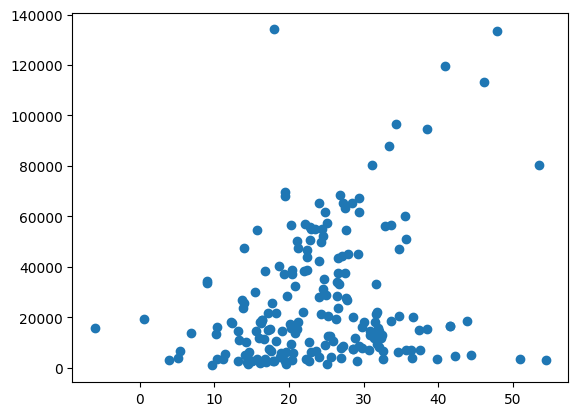

In [18]:
plt.scatter(df_test['NY.GNS.ICTR.ZS'], df_test['NY.GDP.PCAP.PP.KD'])

In [20]:
df_test[['NY.GNS.ICTR.ZS','NY.GDP.PCAP.PP.KD' ]].corr(method='spearman')

,NY.GNS.ICTR.ZS,NY.GDP.PCAP.PP.KD
NY.GNS.ICTR.ZS,1.000000,0.221548
NY.GDP.PCAP.PP.KD,0.221548,1.000000


In [25]:
economies.head(2)

,id,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
0,ABW,Aruba,False,-70.0167,12.5167,LCN,,LNX,HIC,Oranjestad
1,AFE,Africa Eastern and Southern,True,NaN,NaN,,,,,


In [24]:
uniquedf = df['economy'].unique()
uniquecon = economies['id'].unique()

In [27]:
print(set(uniquedf) - set(uniquecon))
print(set(uniquecon)- set(uniquedf))

set()
set()


In [28]:
full  =  df.merge(economies[['id', 'region', 'incomeLevel', 'capitalCity']], left_on="economy", right_on='id', indicator = True)

In [29]:
full.drop(columns=['id','Time'], inplace=True)

In [30]:
full[full['region']=='']['Country'].unique() # Drop geographical unities that are not countries..

array(['World', 'Upper middle income',
       'Sub-Saharan Africa (IDA & IBRD countries)',
       'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'South Asia (IDA & IBRD)', 'South Asia', 'Small states',
       'Pre-demographic dividend', 'Post-demographic dividend',
       'Pacific island small states', 'Other small states',
       'OECD members', 'Not classified', 'North America', 'Middle income',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa', 'Lower middle income', 'Low income',
       'Low & middle income',
       'Least developed countries: UN classification',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean', 'Late-demographic dividend',
       'IDA total', 'IDA only', 'IDA blend', 'IDA & IBRD total',
       'IBRD only', 'High income',
   

In [31]:
df = full[full['region']!='']

In [32]:
df.drop(columns=['_merge']).to_csv("solow-hypothesis.csv")

In [33]:
df

,economy,time,Country,NY.GDP.PCAP.PP.KD,NY.GNS.ICTR.ZS,SP.POP.GROW,region,incomeLevel,capitalCity,_merge
0,ZWE,2019,Zimbabwe,3294.806084,16.746879,1.563534,SSF,LMC,Harare,both
1,ZWE,2018,Zimbabwe,3572.983589,13.923906,1.487416,SSF,LMC,Harare,both
2,ZWE,2017,Zimbabwe,3453.509708,64.646674,1.442854,SSF,LMC,Harare,both
3,ZWE,2016,Zimbabwe,3366.344290,-4.967818,1.388200,SSF,LMC,Harare,both
4,ZWE,2015,Zimbabwe,3382.923133,-10.086841,1.339959,SSF,LMC,Harare,both
...,...,...,...,...,...,...,...,...,...,...
2165,AFG,2014,Afghanistan,3017.942544,NaN,3.632519,SAS,LIC,Kabul,both
2166,AFG,2013,Afghanistan,3046.579931,NaN,3.418227,SAS,LIC,Kabul,both
2167,AFG,2012,Afghanistan,2985.319145,NaN,4.047863,SAS,LIC,Kabul,both
2168,AFG,2011,Afghanistan,2757.052587,NaN,3.691503,SAS,LIC,Kabul,both


In [34]:
df.rename(columns={'NY.GDP.PCAP.PP.KD':'Gdp',
                   'NY.GNS.ICTR.ZS':'Save',
                   'SP.POP.GROW':'Population'},
          inplace=True)

<ipython-input-34-85efa7b3400d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'NY.GDP.PCAP.PP.KD':'Gdp',


In [35]:
df

,economy,time,Country,Gdp,Save,Population,region,incomeLevel,capitalCity,_merge
0,ZWE,2019,Zimbabwe,3294.806084,16.746879,1.563534,SSF,LMC,Harare,both
1,ZWE,2018,Zimbabwe,3572.983589,13.923906,1.487416,SSF,LMC,Harare,both
2,ZWE,2017,Zimbabwe,3453.509708,64.646674,1.442854,SSF,LMC,Harare,both
3,ZWE,2016,Zimbabwe,3366.344290,-4.967818,1.388200,SSF,LMC,Harare,both
4,ZWE,2015,Zimbabwe,3382.923133,-10.086841,1.339959,SSF,LMC,Harare,both
...,...,...,...,...,...,...,...,...,...,...
2165,AFG,2014,Afghanistan,3017.942544,NaN,3.632519,SAS,LIC,Kabul,both
2166,AFG,2013,Afghanistan,3046.579931,NaN,3.418227,SAS,LIC,Kabul,both
2167,AFG,2012,Afghanistan,2985.319145,NaN,4.047863,SAS,LIC,Kabul,both
2168,AFG,2011,Afghanistan,2757.052587,NaN,3.691503,SAS,LIC,Kabul,both


In [37]:
df   = df.pivot(index = ['economy', 'Country'], columns='time', values=['Gdp',	'Save'	,'Population'])

KeyError: 'economy'

In [39]:
df

Gdp                                            \
time                          2010          2011          2012          2013   
economy Country                                                                
ABW     Aruba         35508.594573  36435.555333  35530.260044  37255.353452   
AFG     Afghanistan    2848.586061   2757.052587   2985.319145   3046.579931   
AGO     Angola         9672.839224   9627.020598  10051.339912  10150.916096   
ALB     Albania       12041.749064  12381.524168  12577.755578  12727.083013   
AND     Andorra       58285.057776  60470.466238  58172.132393  57332.158561   
...                            ...           ...           ...           ...   
XKX     Kosovo         7877.101999   8359.936215   8431.662327   8828.276833   
YEM     Yemen, Rep.            NaN           NaN           NaN           NaN   
ZAF     South Africa  14182.334285  14451.929184  14581.588957  14699.066813   
ZMB     Zambia         3266.507493   3335.643395   3474.552528   3535.224490   
ZWE     Zimbabwe       2572.769992   2897.100919   3299.259847   3357.128269   

                                                                              \
time                          2014          2015          2016          2017   
economy Country                                                                
ABW     Aruba         36275.680955  35682.300253  36021.830836  38558.004558   
AFG     Afghanistan    3017.942544   2967.692067   2958.785399   2952.998916   
AGO     Angola        10250.592404   9980.929882   9381.809726   9042.117129   
ALB     Albania       12979.765004  13306.443241  13769.546483  14306.298863   
AND     Andorra       59929.244467  62105.154239  64402.809237  63239.657771   
...                            ...           ...           ...           ...   
XKX     Kosovo         9150.749973   9824.991060  10434.888826  10856.290207   
YEM     Yemen, Rep.            NaN           NaN           NaN           NaN   
ZAF     South Africa  14661.262435  14559.474378  14519.030855  14591.436676   
ZMB     Zambia         3585.577485   3576.925448   3598.171660   3612.505977   
ZWE     Zimbabwe       3360.552173   3382.923133   3366.344290   3453.509708   

                                                  ... Population            \
time                          2018          2019  ...       2010      2011   
economy Country                                   ...                        
ABW     Aruba         39419.555348  38435.426913  ...   0.230041  0.736689   
AFG     Afghanistan    2902.392113   2927.245144  ...   2.934687  3.691503   
AGO     Angola         8620.214664   8274.542562  ...   3.851098  3.887946   
ALB     Albania       14918.080774  15290.777551  ...  -0.496462 -0.269017   
AND     Andorra       63048.598557  63215.899792  ...  -3.866965 -3.689002   
...                            ...           ...  ...        ...       ...   
XKX     Kosovo        11188.224463  11774.117851  ...  -0.331415  0.179072   
YEM     Yemen, Rep.            NaN           NaN  ...   3.138564  3.049745   
ZAF     South Africa  14571.375633  14370.238039  ...   1.182910  1.236315   
ZMB     Zambia         3646.959665   3591.564189  ...   3.461923  3.325276   
ZWE     Zimbabwe       3572.983589   3294.806084  ...   1.613343  1.772651   

                                                                        \
time                      2012      2013      2014      2015      2016   
economy Country                                                          
ABW     Aruba         1.469782  1.492031  1.065512  1.023701  0.757968   
AFG     Afghanistan   4.047863  3.418227  3.632519  3.119959  2.535720   
AGO     Angola        3.883584  3.849981  3.732728  3.605072  3.576441   
ALB     Albania      -0.165151 -0.183211 -0.207047 -0.291206 -0.159880   
AND     Andorra      -1.227565 -2.157581 -1.956673 -2.142484  0.009698   
...                        ...       ...       ...       ...       ...   
XKX     Kosovo        0.843388

In [40]:
df.columns = [col[0] + str(col[1]) for col in df.columns]

In [41]:
df

,,Gdp2010,Gdp2011,Gdp2012,Gdp2013,Gdp2014,Gdp2015,Gdp2016,Gdp2017,Gdp2018,Gdp2019,...,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,Population2016,Population2017,Population2018,Population2019
economy,Country,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,35508.594573,36435.555333,35530.260044,37255.353452,36275.680955,35682.300253,36021.830836,38558.004558,39419.555348,38435.426913,...,0.230041,0.736689,1.469782,1.492031,1.065512,1.023701,0.757968,0.007358,0.158976,0.270505
AFG,Afghanistan,2848.586061,2757.052587,2985.319145,3046.579931,3017.942544,2967.692067,2958.785399,2952.998916,2902.392113,2927.245144,...,2.934687,3.691503,4.047863,3.418227,3.632519,3.119959,2.535720,2.808337,2.910810,2.984389
AGO,Angola,9672.839224,9627.020598,10051.339912,10150.916096,10250.592404,9980.929882,9381.809726,9042.117129,8620.214664,8274.542562,...,3.851098,3.887946,3.883584,3.849981,3.732728,3.605072,3.576441,3.540612,3.453233,3.387884
ALB,Albania,12041.749064,12381.524168,12577.755578,12727.083013,12979.765004,13306.443241,13769.546483,14306.298863,14918.080774,15290.777551,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
AND,Andorra,58285.057776,60470.466238,58172.132393,57332.158561,59929.244467,62105.154239,64402.809237,63239.657771,63048.598557,63215.899792,...,-3.866965,-3.689002,-1.227565,-2.157581,-1.956673,-2.142484,0.009698,2.168040,1.878853,1.730503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,7877.101999,8359.936215,8431.662327,8828.276833,9150.749973,9824.991060,10434.888826,10856.290207,11188.224463,11774.117851,...,-0.331415,0.179072,0.843388,0.606471,-0.293646,-1.361508,-0.600477,0.753859,0.338173,-0.457059
YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.138564,3.049745,3.037729,3.045627,3.068324,3.040259,3.002138,3.012228,2.960379,2.966335
ZAF,South Africa,14182.334285,14451.929184,14581.588957,14699.066813,14661.262435,14559.474378,14519.030855,14591.436676,14571.375633,14370.238039,...,1.182910,1.236315,1.474794,1.652652,1.661445,2.009888,0.940522,0.653837,1.682370,1.649575
